# this imports the results of reliability ~ evidence fair model comparison

we create brainmaps for GRs, FRs and for 'both' that show the participant-specific benefit of realibility vs a group consensus (fairly compared via pairwise analysis) 

# import

In [1]:
from tqdm import tqdm_notebook
import numpy as np
import deepdish as dd
import os
import h5py
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
# from _classification_util import *
# from _mempal_util import *
from _searchlight_util import *

In [2]:
roi = 'SL'
hems=['L','R']
nPerm = 1000
nSubj =25
nRooms = 23
nItems=23
nTrials = 23
measure_key ='reliability'#'distinctiveness'#'reliability'

scores = {}
rois = []


# date = 20240108


measure_list = ['subj_{}~evidence'.format(measure_key),'group_{}~evidence'.format(measure_key), 'm0_r2','m1_r2',]


date = 20240401 # second permutation test fix
date = 20250404 # fair model comparison

date = 20250524 # fair model comparison, revision update (for repo)


scores = {}
for network in ['ROCN','POCN']: #['RRCN'] :#, 'PRCN']:
    scores[network]  = {}
    for trial_type in ['GR','FR']:
        scores[network][trial_type] = {}
        for measure in measure_list:
            scores[network][trial_type][measure] = {}
            
            for hem in ['L','R']:
        
                # if a correlation
                if '~' in measure:
                    scores[network][trial_type][measure][hem] = np.zeros((len(SLlist[hem]),nSubj, nPerm+1))

                if 'm0' or 'm1' in item: # for coeffs and aic
                    scores[network][trial_type][measure][hem] = np.zeros((len(SLlist[hem]), nSubj, nPerm+1))



                for roi_id in tqdm_notebook(range(len(SLlist[hem]))[:]):
                    savedir = '../PythonData2024/Output/Reliability2Evidence'
#                     savedir = '../PythonData2024/Output/Reliability2RoomEvidence'
#                     savedir = '../PythonData2024/Output/Reliability2ObjectEvidence'
#                     savedir = '../PythonData2024/Output/Reliability2Evidence_RRCN_PRCN'
    
                    # this is for correlating reliablity 2 room evidence from RRCN where RRCN comes from
#                     # room evidence during object recall events
#                     date = 20250312 # RRCN derived from room evidence during object events
#                     savedir = '../PythonData2024/Output/Reliability2Evidence_RRCN_v2'

                    
                    savedir = '../PythonData2024/Output/Reliability2Evidence_PairWise' #fair model comparison

                    filename = '{}_{}{:03d}_{}_{}2evidence_{}_{}'.format(date,roi,roi_id,hem,measure_key,network,trial_type) + '.h5'
                    fullpath = os.path.join(savedir, filename)

                    scores[network][trial_type][measure][hem][roi_id] =  dd.io.load(fullpath,'/{}'.format(measure))

 



/jukebox/pkgs/PYGER/base/envs/0.11.0/lib/python3.7/site-packages/ipykernel_launcher.py:45: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

  0%|          | 0/1483 [00:00<?, ?it/s]

# subj-level performance

### best SLs for GRs and FRs

In [3]:
item = 'subj_{}~evidence'.format(measure_key)
top_amount = 4 ;

top_r2r_ev = {} # reliabilty ~ evidence
for network in ['ROCN','POCN']:# 'PRCN']:
    top_r2r_ev[network]  = {}
    for trial_type in ['GR','FR']:
        top_r2r_ev[network][trial_type] = {}
        
        for hem in ['L','R']:
            subj_mean = scores[network][trial_type][item][hem][:,:,0].mean(1) #average subj
            high_corr_idx = np.argsort(subj_mean)[::-1][:top_amount]
            print(high_corr_idx)
            
            print('corrs: ', network, trial_type, hem, subj_mean[high_corr_idx].mean())
            
            print("-------------------------------")
            
            top_r2r_ev[network][trial_type][hem] = high_corr_idx
            
        


[ 674  675 1269 1071]
corrs:  ROCN GR L 0.12721133761508044
-------------------------------
[1076  920   73 1298]
corrs:  ROCN GR R 0.1665376439773832
-------------------------------
[1041  597 1168  495]
corrs:  ROCN FR L 0.1829222060540322
-------------------------------
[ 190  622  549 1213]
corrs:  ROCN FR R 0.1339671442007342
-------------------------------
[285 746 349 550]
corrs:  POCN GR L 0.12735965586693987
-------------------------------
[ 986  580 1127  985]
corrs:  POCN GR R 0.12934846364504454
-------------------------------
[ 966   22 1367  972]
corrs:  POCN FR L 0.12794332290283045
-------------------------------
[ 627 1162 1290    5]
corrs:  POCN FR R 0.1200754462197811
-------------------------------


### best SLs for combined GRs and FRs

In [4]:
import numpy as np

def print_top_searchlights(scores, measure_key='subj_reliability~evidence',
                           top_thresh=100, networks=['ROCN', 'POCN']):
    for network in networks:
        print(f'\n=== {network} ===')
        for hem in ['L', 'R']:
            try:
                gr = scores[network]['GR'][measure_key][hem][:,:,0]
                fr = scores[network]['FR'][measure_key][hem][:,:,0]
                avg = (gr.mean(1) + fr.mean(1)) / 2

                top_idx = np.argsort(avg)[::-1][:top_thresh]
                print(f'{hem}: top {top_thresh} SLs →', top_idx.tolist())

            except Exception as e:
                print(f'{network} {hem} failed: {e}')

                
print_top_searchlights(scores, top_thresh=5)



=== ROCN ===
L: top 5 SLs → [1041, 59, 836, 1168, 289]
R: top 5 SLs → [1076, 388, 73, 1169, 190]

=== POCN ===
L: top 5 SLs → [972, 966, 738, 1364, 584]
R: top 5 SLs → [1391, 144, 422, 580, 1395]


### scatter plot per subj

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import deepdish as dd
import os
from scipy import stats
from scipy.stats import zscore

from _mempal_util import load_obj

def plot_reliability_vs_evidence_per_subject(roi_id, hem, sl_index, network, trial_type,
                                              reliability_date=20240108,
                                              rip_date=20250524,
                                              shift=4,
                                              top_thresh=50,
                                              measure_key='reliability',
                                              z = True):
    """
    Plots 25 scatter plots (one per subject) of room reliability vs. recall evidence
    for a given searchlight index and network, including a 45-degree reference line.
    """
    
    ref_line_scaler = 1

    # Load reliability
    reliability_dir = '../PythonData2024/Output/room2room'
    reliability_path = os.path.join(reliability_dir,
        f'{reliability_date}_SL{roi_id:03d}_{hem}_RoomReliability.h5')
    room_reliability = dd.io.load(reliability_path, group=f'/{measure_key}')[:, :, 0]  # (nItems, nSubj)

    # Load evidence
    evidence_path = os.path.join(
        '../PythonData2024/Output/RecallEvidence',
        f'{rip_date}_NetworksRecallEvidence_shift{shift}_top{top_thresh}.pkl'
    )
    network_evidence = load_obj(evidence_path)
    item_evidence = network_evidence[network][trial_type]  # shape: (nItems, nSubj)

    # Fixed axis limits (adjust if needed)
#     axis_min, axis_max = -3, 3
    # Precompute global z-score bounds if z=True
    if z:
        all_z = []
        for si in range(25):
            y_raw = item_evidence[:, si]
            x_raw = room_reliability[:, si]
            nonnans = ~np.isnan(y_raw)
            all_z.append(zscore(x_raw[nonnans]))
            all_z.append(zscore(y_raw[nonnans]))
        all_z = np.concatenate(all_z)
        z_limit = np.nanmax(np.abs(all_z))
        axis_min, axis_max = -z_limit, z_limit
        print(axis_min, axis_max)
    else:
        axis_min, axis_max = np.nanmin([room_reliability.min(), item_evidence.min()]), \
                             np.nanmax([room_reliability.max(), item_evidence.max()])


    fig, axs = plt.subplots(5, 5, figsize=(15, 12), constrained_layout=True)
    axs = axs.flatten()

#     for si in range(25):
#         x = room_reliability[:, si]
#         y = item_evidence[:, si]
#         nonnans = ~np.isnan(y)

#         corr = stats.pearsonr(x[nonnans], y[nonnans])[0]

#         axs[si].scatter(x, y, s=20, alpha=0.7)
# #         axs[si].plot([axis_min/ref_line_scaler, axis_max/ref_line_scaler], 
# #                      [axis_min/ref_line_scaler, axis_max/ref_line_scaler], 'k--', lw=1, alpha=0.4)  # 45° line

#         axs[si].set_title(f'Subj {si+1} | r={corr:.3f}', fontsize=9)
# #         axs[si].set_xlim(axis_min, axis_max)
# #         axs[si].set_ylim(axis_min, axis_max)
#         axs[si].axhline(0, color='gray', lw=0.5)
#         axs[si].axvline(0, color='gray', lw=0.5)
        
    for si in range(25):
        x_raw = room_reliability[:, si]
        y_raw = item_evidence[:, si]
        nonnans = ~np.isnan(y_raw)

        # Only use valid values
        if z:
            x = zscore(x_raw[nonnans])
            y = zscore(y_raw[nonnans])
        else:
            x = x_raw
            y = y_raw

        corr = stats.pearsonr(x, y)[0]
        axs[si].scatter(x, y, s=20, alpha=0.7)
        
        axs[si].plot([axis_min/ref_line_scaler, axis_max/ref_line_scaler], 
                     [axis_min/ref_line_scaler, axis_max/ref_line_scaler], 'k--', lw=1, alpha=0.4)  # 45° line

        axs[si].set_xlim(axis_min, axis_max)
        axs[si].set_ylim(axis_min, axis_max)

#         # Best-fit line (on z-scored values)
#         slope, intercept = np.polyfit(x, y, 1)
#         axs[si].plot(x, slope * x + intercept, color='red', lw=1.2, alpha=0.8)

        axs[si].set_title(f'Subj {si+1} | r={corr:.3f}', fontsize=9)
        axs[si].axhline(0, color='gray', lw=0.5)
        axs[si].axvline(0, color='gray', lw=0.5)


    fig.suptitle(f'SL {sl_index} | {network} | {trial_type} | {hem}', fontsize=16)
    plt.savefig("Figs/scatter_SL1041_ROCN_FR_L_corr_transparent.png",dpi=300, bbox_inches='tight', transparent=True)
    
    plt.show()


-3.461980838720866 3.461980838720866


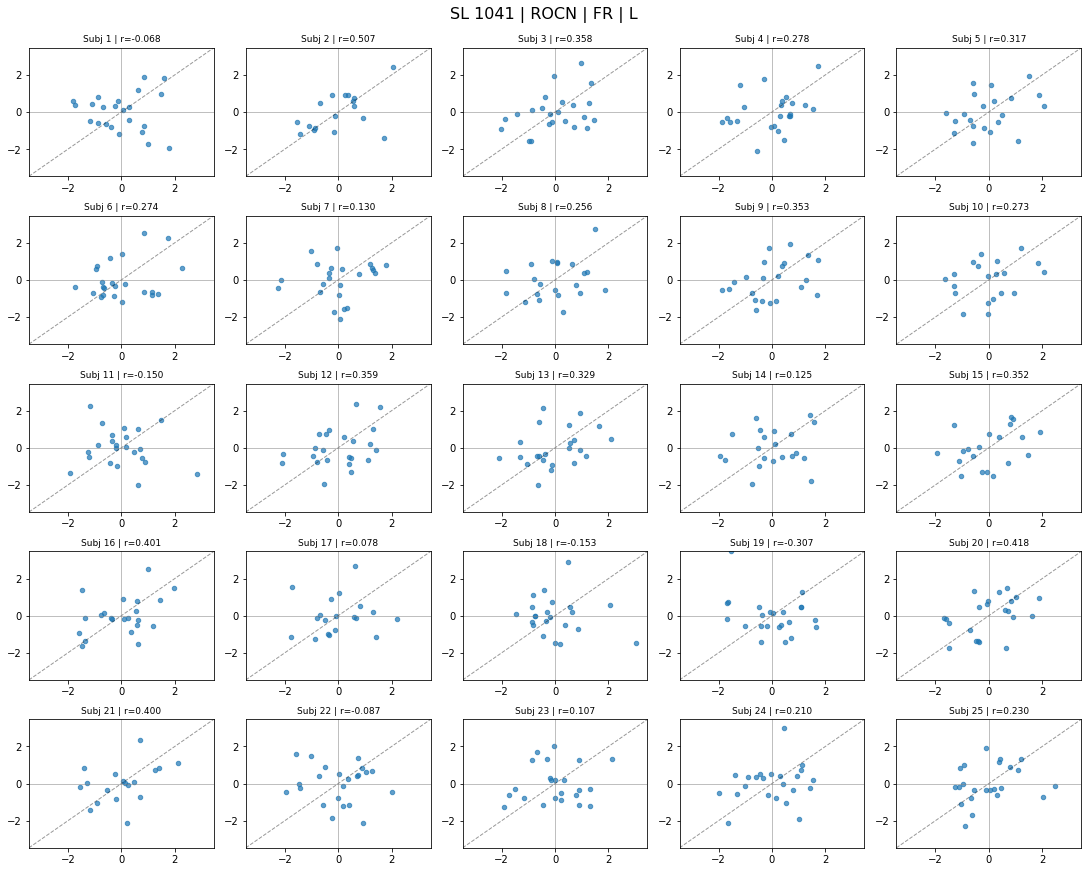

In [11]:
plot_reliability_vs_evidence_per_subject(
    roi_id=1041,      # your chosen SL index
    hem='L',
    sl_index=1041,    # same as roi_id here
    network='ROCN',
    trial_type='FR',
    z=True
)


-3.461980838720866 3.461980838720866


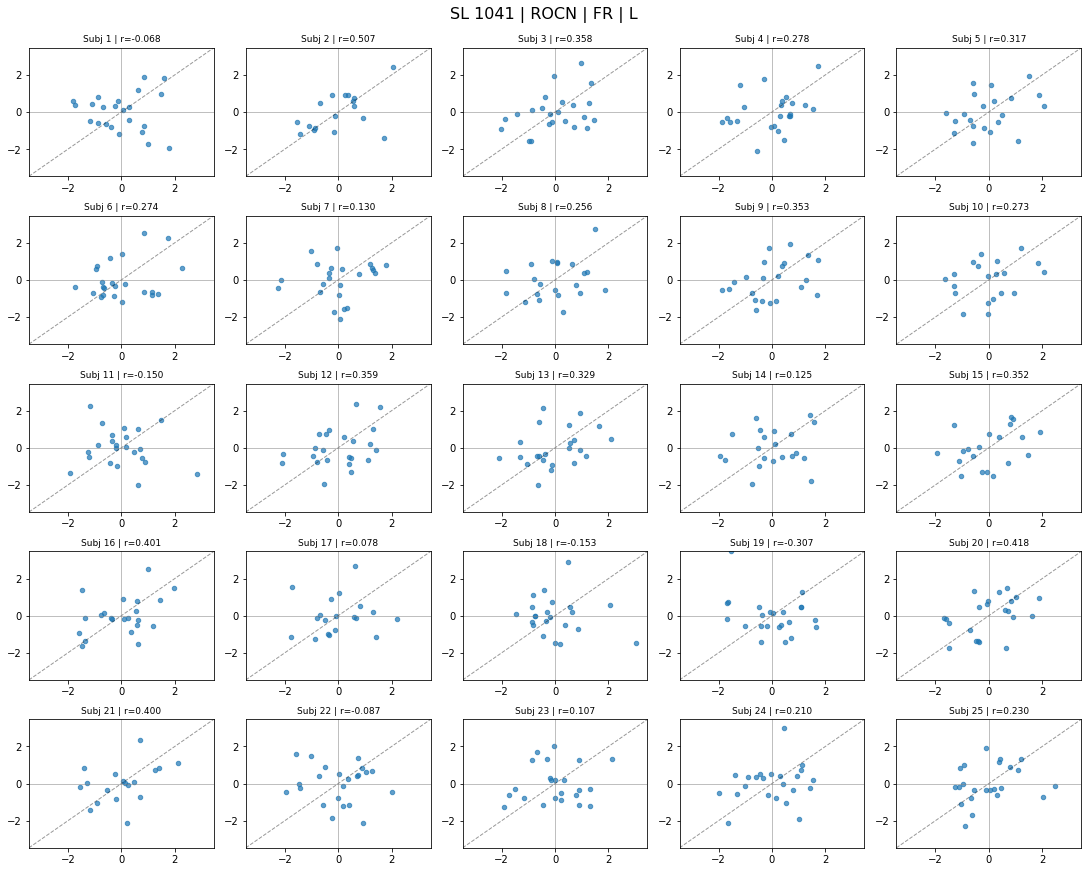

In [19]:
plot_reliability_vs_evidence_per_subject(
    roi_id=1041,      # your chosen SL index
    hem='L',
    sl_index=1041,    # same as roi_id here
    network='ROCN',
    trial_type='FR',
    z=True
)


# Generate Brainmaps

### generate brainmaps for GR and FR separately

In [6]:
import scipy.stats as stats 


nv = 40962 #verts in fsaverage6 brain
# raw_vox = {} # raw values
# p_vox = {} # non-parametric p-values
# q_vox = {} # q-values from FDR-correction
# z_vox = {} # z-values

## to do stats on searchlights, i want the (values,nPerm+1) or the (values) first
## then i convert to vertex space
## then i average these values in vertex space
## then i do the statistics on them

calculations = ['m1vsm0_r2', 'subj_{}~evidence'.format(measure_key),'group_{}~evidence'.format(measure_key)]

results = {}

# ['room2room', 'room2object', 'isc_rooms', 'isc_objects']

# for network in ['SL']:
for network in ['ROCN','POCN']: #, 'PRCN']:

    results[network] = {}
    for trial_type in ['GR','FR']:
        
        results[network][trial_type] = {}
        
        for measuretype in tqdm_notebook(calculations):
            results[network][trial_type][measuretype] = {}
            
            print('...MEASURETYPE: {} ....', measuretype)

            if '~' in measuretype:
                print('....... if isc and ~ in value', measuretype)

                #average across subj from (nSLs,nSubj,nPerm+1) to (nSLs,nPerm+1)
                ## added tanh 20240924
                dd_hem =  {'L':np.tanh(np.arctanh(scores[network][trial_type][measuretype]['L']).mean(1)),
                           'R':np.tanh(np.arctanh(scores[network][trial_type][measuretype]['R']).mean(1))} 

                dd_vox = SLtoVox(dd_hem, ROIlist,nv,zeronan=False) #

                raw = {'L':[],'R':[]}
                z = {'L':[],'R':[]}
                for hem in ['L','R']:
                    z[hem] = nullZ(dd_vox[hem])
                    raw[hem] = dd_vox[hem][:,0] #grab the true val, the rest are perms

    #             q = FDR_z_hem(z)

                results[network][trial_type][measuretype]['raw'] = raw
                results[network][trial_type][measuretype]['z'] = z
                results[network][trial_type][measuretype]['q'] = FDR_z_hem(z,sided=2)

            elif measuretype == 'm1vsm0_r2': 
                p_vox = {'L':[],'R':[]}
                raw_vox = {'L':[],'R':[]}
    #             q_vox = {'L':[],'R':[]}

                dd_hem = {'L':(scores[network][trial_type]['m1_r2']['L']-scores[network][trial_type]['m0_r2']['L']).mean(1),
                          'R':(scores[network][trial_type]['m1_r2']['R']-scores[network][trial_type]['m0_r2']['R']).mean(1)} #nSLs,1 fscore, nPerm)

                dd_vox = SLtoVox(dd_hem, ROIlist,nv,zeronan=False)

                for hem in ['L','R']:
                    p_vox[hem] = NonparametricP(dd_vox[hem],sided=2) ## p-value from F-Score
                    raw_vox[hem] = dd_vox[hem][:,0] #

                q_vox = FDR_p_hem(p_vox) #nonparametric version

                results[network][trial_type][measuretype]['raw'] = raw_vox.copy()
    #             results[measuretype][value]['p'] = dd_p_vox.copy()
                results[network][trial_type][measuretype]['q'] = FDR_p_hem(p_vox)
        
        
            




print('complete.')

/jukebox/pkgs/PYGER/base/envs/0.11.0/lib/python3.7/site-packages/ipykernel_launcher.py:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3 [00:00<?, ?it/s]

...MEASURETYPE: {} .... m1vsm0_r2
...MEASURETYPE: {} .... subj_reliability~evidence
....... if isc and ~ in value subj_reliability~evidence


/mnt/cup/labs/norman/rmasis/MemPal/analysis/MemPal2024/MemoryPalaceReliability/_searchlight_util.py:43: RuntimeWarning: Mean of empty slice
  means = np.nanmean(X_roll[1:],0)
/jukebox/pkgs/PYGER/base/envs/0.11.0/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


...MEASURETYPE: {} .... group_reliability~evidence
....... if isc and ~ in value group_reliability~evidence


  0%|          | 0/3 [00:00<?, ?it/s]

...MEASURETYPE: {} .... m1vsm0_r2
...MEASURETYPE: {} .... subj_reliability~evidence
....... if isc and ~ in value subj_reliability~evidence
...MEASURETYPE: {} .... group_reliability~evidence
....... if isc and ~ in value group_reliability~evidence


  0%|          | 0/3 [00:00<?, ?it/s]

...MEASURETYPE: {} .... m1vsm0_r2
...MEASURETYPE: {} .... subj_reliability~evidence
....... if isc and ~ in value subj_reliability~evidence
...MEASURETYPE: {} .... group_reliability~evidence
....... if isc and ~ in value group_reliability~evidence


  0%|          | 0/3 [00:00<?, ?it/s]

...MEASURETYPE: {} .... m1vsm0_r2
...MEASURETYPE: {} .... subj_reliability~evidence
....... if isc and ~ in value subj_reliability~evidence
...MEASURETYPE: {} .... group_reliability~evidence
....... if isc and ~ in value group_reliability~evidence
complete.


### generate brainmaps statistically combining GR and FR

In [7]:
import scipy.stats as stats 


nv = 40962 #verts in fsaverage6 brain
# raw_vox = {} # raw values
# p_vox = {} # non-parametric p-values
# q_vox = {} # q-values from FDR-correction
# z_vox = {} # z-values

## to do stats on searchlights, i want the (values,nPerm+1) or the (values) first
## then i convert to vertex space
## then i average these values in vertex space
## then i do the statistics on them

calculations = ['m1vsm0_r2', 'subj_{}~evidence'.format(measure_key),'group_{}~evidence'.format(measure_key)]

update_results = {}

# ['room2room', 'room2object', 'isc_rooms', 'isc_objects']

# for network in ['SL']:
for network in ['ROCN','POCN']: #, 'PRCN']:

    update_results[network] = {}
    for trial_type in ['both']:
        
        update_results[network][trial_type] = {}
        
        for measuretype in tqdm_notebook(calculations):
            update_results[network][trial_type][measuretype] = {}
            
            print('...MEASURETYPE: {} ....', measuretype)

            if '~' in measuretype:
                print('....... if isc and ~ in value', measuretype)
                
                ## AVERAGE ACROSS BOTH GRs and FRs before running the tests afterwards
                ## output of this average is (nSLs, nSubj, nPerm+1)
                leftmean = np.nanmean(np.stack((scores[network]['GR'][measuretype]['L'], 
                                                scores[network]['FR'][measuretype]['L'])), 0)

                rightmean = np.nanmean(np.stack((scores[network]['GR'][measuretype]['R'], 
                                                 scores[network]['FR'][measuretype]['R'])), 0)

                #average across subj from (nSLs,nSubj,nPerm+1) to (nSLs,nPerm+1)
                ## added tanh 20240924
                dd_hem =  {'L':np.tanh(np.arctanh(leftmean).mean(1)),
                           'R':np.tanh(np.arctanh(rightmean).mean(1))} 

                dd_vox = SLtoVox(dd_hem, ROIlist,nv,zeronan=False) #

                raw = {'L':[],'R':[]}
                z = {'L':[],'R':[]}
                for hem in ['L','R']:
                    z[hem] = nullZ(dd_vox[hem])
                    raw[hem] = dd_vox[hem][:,0] #grab the true val, the rest are perms

    #             q = FDR_z_hem(z)

                update_results[network][trial_type][measuretype]['raw'] = raw
                update_results[network][trial_type][measuretype]['z'] = z
                update_results[network][trial_type][measuretype]['q'] = FDR_z_hem(z,sided=2)

            elif measuretype == 'm1vsm0_r2': 
                p_vox = {'L':[],'R':[]}
                raw_vox = {'L':[],'R':[]}
    #             q_vox = {'L':[],'R':[]}
    
                ## AVERAGE ACROSS BOTH GRs and FRs before running the tests afterwards
                ## output of this average is (nSLs, nSubj, nPerm+1)
                leftmean_1 = np.nanmean(np.stack((scores[network]['GR']['m1_r2']['L'], 
                                                scores[network]['FR']['m1_r2']['L'])), 0)

                rightmean_1 = np.nanmean(np.stack((scores[network]['GR']['m1_r2']['R'], 
                                                 scores[network]['FR']['m1_r2']['R'])), 0)
                
                
                leftmean_2 = np.nanmean(np.stack((scores[network]['GR']['m0_r2']['L'], 
                                                scores[network]['FR']['m0_r2']['L'])), 0)

                rightmean_2 = np.nanmean(np.stack((scores[network]['GR']['m0_r2']['R'], 
                                                 scores[network]['FR']['m0_r2']['R'])), 0)
                

                dd_hem = {'L':(leftmean_1-leftmean_2).mean(1),
                          'R':(rightmean_1-rightmean_2).mean(1)} #nSLs,1 fscore, nPerm)

                dd_vox = SLtoVox(dd_hem, ROIlist,nv,zeronan=False)

                for hem in ['L','R']:
                    p_vox[hem] = NonparametricP(dd_vox[hem],sided=2) ## p-value from F-Score
                    raw_vox[hem] = dd_vox[hem][:,0] #

                q_vox = FDR_p_hem(p_vox) #nonparametric version

                update_results[network][trial_type][measuretype]['raw'] = raw_vox.copy()
    #             update_results[measuretype][value]['p'] = dd_p_vox.copy()
                update_results[network][trial_type][measuretype]['q'] = FDR_p_hem(p_vox)
        
        
            




print('complete.')

/jukebox/pkgs/PYGER/base/envs/0.11.0/lib/python3.7/site-packages/ipykernel_launcher.py:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/3 [00:00<?, ?it/s]

...MEASURETYPE: {} .... m1vsm0_r2
...MEASURETYPE: {} .... subj_reliability~evidence
....... if isc and ~ in value subj_reliability~evidence
...MEASURETYPE: {} .... group_reliability~evidence
....... if isc and ~ in value group_reliability~evidence


  0%|          | 0/3 [00:00<?, ?it/s]

...MEASURETYPE: {} .... m1vsm0_r2
...MEASURETYPE: {} .... subj_reliability~evidence
....... if isc and ~ in value subj_reliability~evidence
...MEASURETYPE: {} .... group_reliability~evidence
....... if isc and ~ in value group_reliability~evidence
complete.


### update results dict to include "both"

In [8]:
results_copy = results.copy()
results_update_copy = update_results.copy()

results_copy['ROCN'].update(results_update_copy['ROCN'])
results_copy['POCN'].update(results_update_copy['POCN'])

update_results['ROCN']

{'both': {'m1vsm0_r2': {'raw': {'L': array([ 0.00706731, -0.00582359,  0.00634477, ...,  0.00746073,
            0.00808728,  0.0083158 ]),
    'R': array([-0.00360874, -0.00854222, -0.00570884, ..., -0.01386678,
           -0.01310074, -0.01284419])},
   'q': {'L': array([0.01645187, 0.02779256, 0.03146195, ..., 0.01645187, 0.00619994,
           0.01050668]),
    'R': array([0.11479016, 0.00459744, 0.03495463, ..., 0.00279433, 0.00279433,
           0.00279433])}},
  'subj_reliability~evidence': {'raw': {'L': array([-0.01112211,  0.04257234,  0.04018518, ...,  0.04066893,
            0.0403466 ,  0.04306599]),
    'R': array([-0.00210288,  0.02494645,  0.00602257, ...,  0.020016  ,
            0.02057201,  0.01990852])},
   'z': {'L': array([-1.22144659,  4.74013957,  4.35989472, ...,  4.51930845,
            4.75943369,  4.6700526 ]),
    'R': array([-0.29769816,  2.88118505,  0.71260599, ...,  2.06677069,
            2.22364994,  2.16915973])},
   'q': {'L': array([9.86648453e-02, 

In [ ]:
results_copy 

# save brainmap

In [9]:
from _mempal_util import save_obj

### DATA
data = results


##### ! !!!!!!!!!!!!!!!!!!!!!!!!!!!!! #########
### 20250404 FAIR MODEL COMAPRISON -- WITH CREATING AN AVERAGE OF FR AND GR TOGETHER!!!!!!!!!!!!!!!!!!!!! ############
##################################################
########### !!!!! @##!@#E!@DADFS!@#! @# ##########
savedate = 20250524
### MAKE SURE TO COMMENT THIS WHEN I RUN THIS
data = results_copy
print("MODIFIED THE DATA MAKE SURE TO CHANGE IF NOT USING UPDATED RESULTS")
fname2save = '../PythonData2024/Output/brainmaps/{}_{}2evidence.pkl'.format(savedate,measure_key)





save_obj(fname2save,data)

print('...', fname2save)

print("complete")


MODIFIED THE DATA MAKE SURE TO CHANGE IF NOT USING UPDATED RESULTS
... ../PythonData2024/Output/brainmaps/20250524_reliability2evidence.pkl
complete


In [11]:
ls ../PythonData2024/Output/brainmaps/

20240108_ClassifyRecalls_Accuracy_shift4.pkl
20240108_ClassifyVideos_Accuracy.pkl
20240108_reliability2evidence.pkl
20240108_Reliability.pkl
20240109_ClassifyVideos_Accuracy.pkl
20240110_ClassifyVideos_Accuracy.pkl
20240111_ClassifyVideos_Accuracy.pkl
20240112_ClassifyVideos_Accuracy.pkl
20240401_ClassifyRecalls_Accuracy_shift4.pkl
20240401_ClassifyVideos_Accuracy.pkl
20240401_reliability2evidence.pkl
20240924_reliability2evidence.pkl
20250227_reliability2RRCNAndPRCNroomsevidence.pkl
20250227_reliability2SLobjectsevidence.pkl
20250227_reliability2SLroomsevidence.pkl
20250301_roomsevidence2objecsevidence.pkl
20250302_TemplateCorrelations.pkl
20250305_reliability2evidence_RRCNcontrol.pkl
20250307_partialcorr_reliability2evidence_RRCNcontrol.pkl
20250312_ClassifyRecalls_Accuracy_shift4.pkl
20250312_partialcorr_reliability2evidence_RRCNcontrol.pkl
20250312_reliability2evidence.pkl
202503201_partialcorr_reliability2evidence_RRCNcontrol.pkl
202503202_partialcorr_reliability2evidence_RRCNcont